In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

%matplotlib inline

#한글 글씨체 사용
mpl.rc('font', family='NanumGothic')

#글씨를 선명하게
set_matplotlib_formats

#음수처리
mpl.rc('axes', unicode_minus=False)

In [2]:
pd.options.display.max_columns=100 #열 최대 갯수 100개

In [3]:
ds_te = pd.read_csv('/home/pirl/Desktop/201701.csv')
ds_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
Name       8 non-null object
date       8 non-null object
amount     8 non-null int64
product    8 non-null object
result     8 non-null object
dtypes: int64(1), object(4)
memory usage: 400.0+ bytes


In [4]:
ds_te

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


In [5]:
ds_te.describe().round(3) #연속형만 가능

,amount
count,8.00
mean,587.50
std,348.21
min,100.00
25%,425.00
50%,600.00
75%,725.00
max,1200.00


In [6]:
ds_te[['result','product']].describe() #명목형도 기술통계량 가능

,result,product
count,8,8
unique,2,5
top,confirmed,apple
freq,6,2


# indexing

In [7]:
ds_te[(ds_te['amount']>200) & (ds_te['result']=='canceled')]
#연산 순서 괄호로 묶기

,Name,date,amount,product,result
3,Park,2017-01-07,500,cereal,canceled


In [8]:
a=(ds_te['amount']>200) & (ds_te['result']=='canceled')
ds_te[a]

,Name,date,amount,product,result
3,Park,2017-01-07,500,cereal,canceled


# loc

In [9]:
ds_te

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


In [10]:
ds_te.loc[3] #row 단위로 인덱스 접근.

Name             Park
date       2017-01-07
amount            500
product        cereal
result       canceled
Name: 3, dtype: object

In [11]:
ds_te.loc[3:5] #head, tail 외에 중간에 접근할 때

,Name,date,amount,product,result
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed


In [12]:
ds_te.loc[3:5][['amount','product']]

,amount,product
3,500,cereal
4,1200,kiwi
5,100,melon


# apply

In [13]:
ds_te

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


In [14]:
def function1(row):
    return row[:4]+'년'+row[5:7]+'월'+row[8:]+'일'

def function2(row):
    return row[:4]+row[5:7]+row[8:]

def info(row):
    print(row.value_counts())
    print("============================")
    print(row.describe())

# ds_te['date'].apply(function1)
# ds_te['date'].apply(function2)
ds_te[['Name', 'result', 'product']].apply(info)

Kang    2
Choi    2
Yoon    1
Lee     1
Kim     1
Park    1
Name: Name, dtype: int64
count        8
unique       6
top       Kang
freq         2
Name: Name, dtype: object
confirmed    6
canceled     2
Name: result, dtype: int64
count             8
unique            2
top       confirmed
freq              6
Name: result, dtype: object
apple     2
banana    2
cereal    2
kiwi      1
melon     1
Name: product, dtype: int64
count         8
unique        5
top       apple
freq          2
Name: product, dtype: object


Name       None
result     None
product    None
dtype: object

In [15]:
def function3(row):  #a가 있으면 A출력 없으면 B출력
    if 'a' in row:
        return 'A'
    else:
        return 'B'
    
    
    
ds_te['product'].apply(function3)

0    A
1    A
2    A
3    A
4    B
5    B
6    A
7    A
Name: product, dtype: object

# col name

In [16]:
ds_te.rename(columns={'Name':'이름'},inplace=True) #변수 이름 바꾸는 법, rename 함수

In [17]:
ds_te

,이름,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


# subplot

In [18]:
ds_te

,이름,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['MalgunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


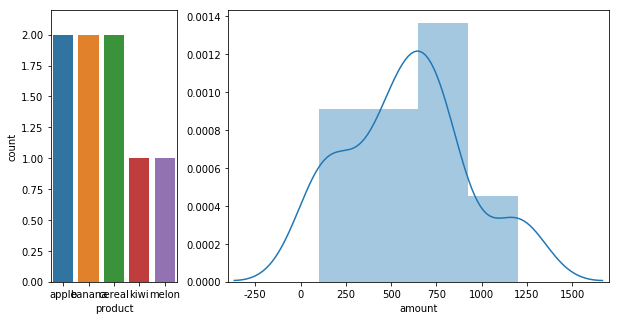

In [19]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,
                                   gridspec_kw={'width_ratios':[1,3]})
figure.set_size_inches(10,5)
ax1.set_ylim(0,2.2)
ax2.set_xlim(-400,1700)
sns.countplot(ds_te['product'],ax=ax1)
sns.distplot(ds_te['amount'],ax=ax2)

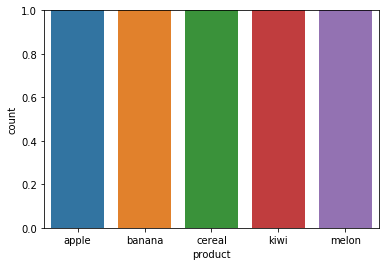

In [20]:
plt.ylim(0,1)
sns.countplot(ds_te['product'])

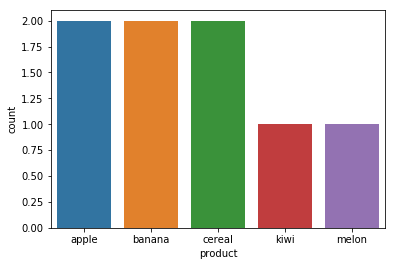

In [21]:
sns.countplot(ds_te['product'])

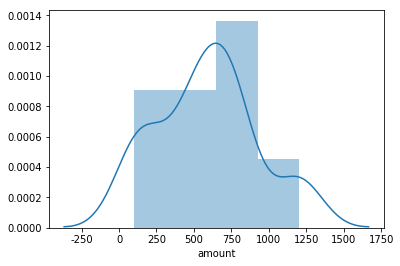

In [22]:
sns.distplot(ds_te['amount'])

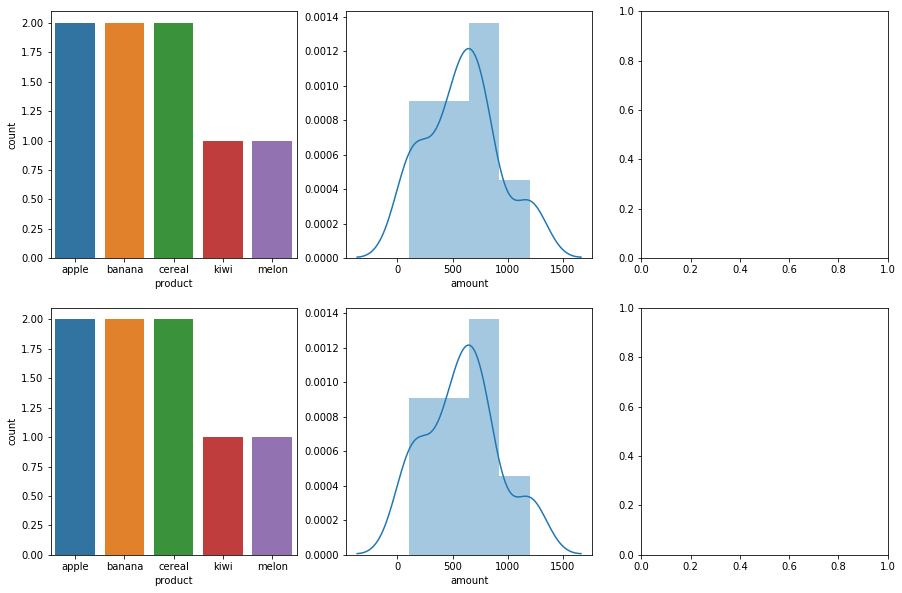

In [23]:
figure, ((ax1,ax2,ax5),(ax3,ax4,ax6))=plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(15,10)
sns.countplot(ds_te['product'], ax=ax1)
sns.distplot(ds_te['amount'], ax=ax2)
sns.countplot(ds_te['product'], ax=ax3)
sns.distplot(ds_te['amount'], ax=ax4)

# Date

In [24]:
ds_te['date'] #object = 문자열

0    2017-01-01
1    2017-01-03
2    2017-01-05
3    2017-01-07
4    2017-01-08
5    2017-01-09
6    2017-01-09
7    2017-01-10
Name: date, dtype: object

In [25]:
ds_te['date(clean)']=pd.to_datetime(ds_te['date']) #datetime형으로 바뀜
ds_te

,이름,date,amount,product,result,date(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05
3,Park,2017-01-07,500,cereal,canceled,2017-01-07
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10


In [26]:
ds_te['date(clean)'].dt.month #월 데이터만 가져옴

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
Name: date(clean), dtype: int64

In [27]:
ds_te['date(clean)'].dt.day #일 데이터만 가져옴

0     1
1     3
2     5
3     7
4     8
5     9
6     9
7    10
Name: date(clean), dtype: int64

In [28]:
ds_te['date(clean)'].dt.weekday_name #요일로 바뀜

0      Sunday
1     Tuesday
2    Thursday
3    Saturday
4      Sunday
5      Monday
6      Monday
7     Tuesday
Name: date(clean), dtype: object

In [29]:
ds_te['date(month)']=ds_te['date(clean)'].dt.month
ds_te['date(day)']=ds_te['date(clean)'].dt.day
ds_te['date(day_of_week)']=ds_te['date(clean)'].dt.weekday_name
ds_te[['date(month)','date(day)','date(day_of_week)']].head()

,date(month),date(day),date(day_of_week)
0,1,1,Sunday
1,1,3,Tuesday
2,1,5,Thursday
3,1,7,Saturday
4,1,8,Sunday


# Replace

In [30]:
ds_te['result']

0    confirmed
1    confirmed
2    confirmed
3     canceled
4    confirmed
5    confirmed
6    confirmed
7     canceled
Name: result, dtype: object

In [31]:
ds_te['result(clean)']=ds_te['result'].replace('confirmed','확인').replace('canceled','취소') #replace 중첩
ds_te[['result', 'result(clean)']]

,result,result(clean)
0,confirmed,확인
1,confirmed,확인
2,confirmed,확인
3,canceled,취소
4,confirmed,확인
5,confirmed,확인
6,confirmed,확인
7,canceled,취소


# Apply

In [32]:
def num(data):
    return data == 'apple'

ds_te['product'].apply(num) #apple인애들은 True인 함수 적용
                            #파이썬 함수 그대로 활용 가능
    


0     True
1    False
2     True
3    False
4    False
5    False
6    False
7    False
Name: product, dtype: bool

In [33]:
def num(data):
    if data=='apple':
        data=1
    if data=='banana':
        data=2
    return data

ds_te['product'].apply(num) #apple인애들은 1, banana는 2로 함수 적용
                            #파이썬 함수 그대로 활용 가능
    

0         1
1         2
2         1
3    cereal
4      kiwi
5     melon
6         2
7    cereal
Name: product, dtype: object

In [34]:
ds_te

,이름,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week),result(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01,1,1,Sunday,확인
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03,1,3,Tuesday,확인
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05,1,5,Thursday,확인
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08,1,8,Sunday,확인
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09,1,9,Monday,확인
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09,1,9,Monday,확인
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10,1,10,Tuesday,취소


In [36]:
url = 'http://bitly.kr/yKYiM'
data1 = pd.read_csv(url)

In [38]:
data1.head()

,Unnamed: 0,idNum,date,problem,MDC,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
0,6823,17-000003,2017-01-01 00:00:42,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Unknown,44.966617,-93.246458,1,Cedar Riverside
1,6824,17-000007,2017-01-01 00:03:07,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Male,44.980450,-93.271340,1,Downtown West
2,6825,17-000073,2017-01-01 00:23:15,traffic,MDC,NaN,NO,NO,Unknown,White,Female,44.948350,-93.275380,5,Whittier
3,6826,17-000092,2017-01-01 00:33:48,suspicious,MDC,NaN,NO,NO,Unknown,East African,Male,44.948360,-93.281350,5,Whittier
4,6827,17-000098,2017-01-01 00:37:58,traffic,MDC,NaN,NO,NO,Unknown,White,Female,44.979078,-93.262076,1,Downtown West


# 시각화
# countplot

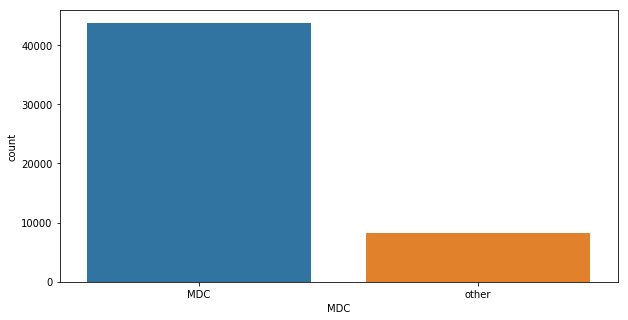

In [42]:
plt.figure(figsize=[10,5])
sns.countplot(data1['MDC'])

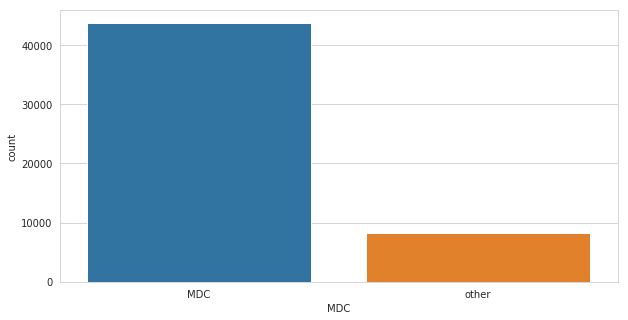

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,5])
sns.countplot(data1['MDC'])

# * "whitegrid" / "darkgrid" / "dark" / "white" / "ticks"

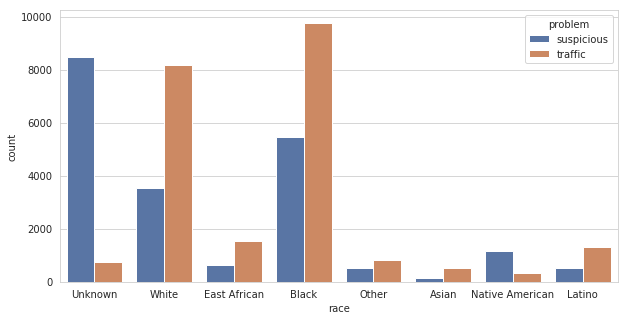

In [55]:
plt.figure(figsize=[10,5])
sns.countplot(data=data1, x='race', hue='problem', color='g', palette=sns.color_palette("deep",2))
#color에 b w g r 등

# color palette

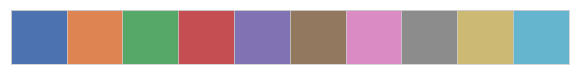

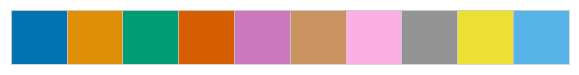

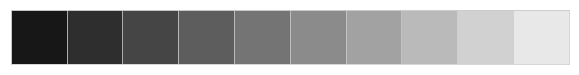

In [51]:
sns.palplot(sns.color_palette("deep",10))
sns.palplot(sns.color_palette("colorblind",10))
sns.palplot(sns.color_palette("gray",10))

# 글씨 겹칠 때

In [56]:
#글씨가 그래프 사이에서 겹칠 때,
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

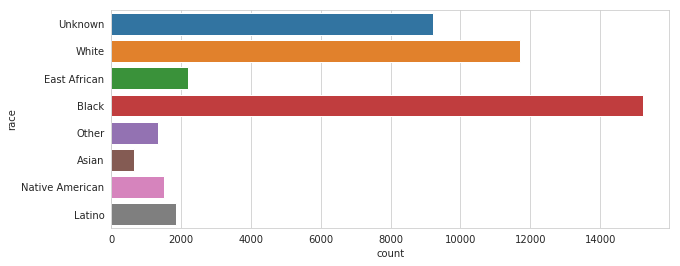

In [59]:
plt.figure(figsize=[10,4])
sns.countplot(data=data1, y='race')

# displot

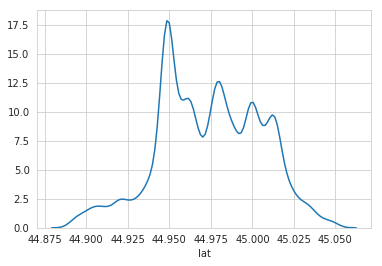

In [66]:
sns.distplot(data1['lat'], hist=False)
#hist지울때 hist=False -> 분포, 정규성 볼때
#곡선 지울때 kde=False -> 정확한 데이터

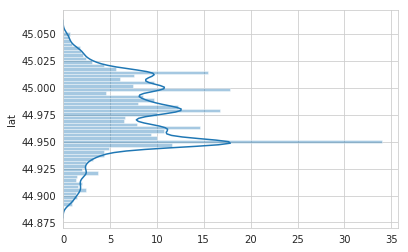

In [67]:
sns.distplot(data1['lat'], vertical=True)
#vertical : 옆으로 누울 때

# distplot label 설정

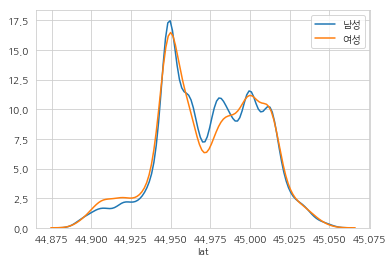

In [75]:
one = data1[data1['gender']=='Male']
two = data1[data1['gender']=='Female']

sns.distplot(one['lat'], label='남성', hist=False)
sns.distplot(two['lat'], label='여성', hist=False)
plt.legend()

# Bar plot

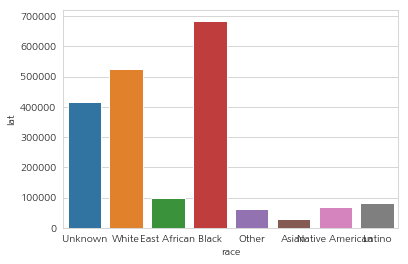

In [83]:
#plt.ylim([44.96, 45]) #y의 범위 설정
sns.barplot(data=data1, x='race', y='lat', estimator=sum) #barplot은 y에 연속형 data가 있어야
#막대그래프의 검은색 줄  : 신뢰구간 의미 ci=99는 99%data 분포 말해줌, ci='sd' 표준편차의 범위
#estimator=sum : 각 항목에 대해서 더한 값(총합) 출력
#estimator의 default: 평균값

# line plot, point plot

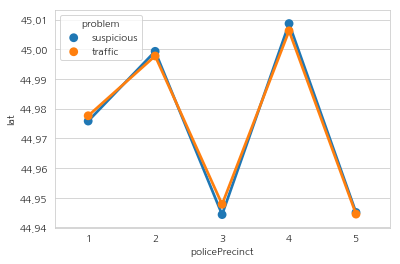

In [85]:
sns.pointplot(data=data1, x='policePrecinct', y='lat', hue='problem')

In [86]:
fmri=sns.load_dataset('fmri')

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


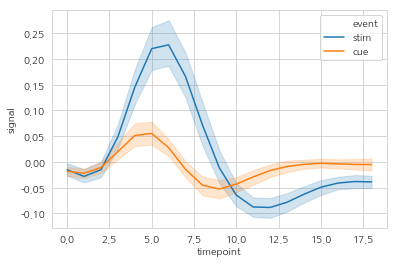

In [87]:
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event')

# Box plot

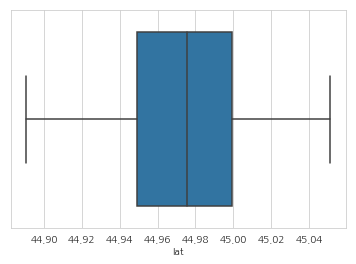

In [88]:
sns.boxplot(data=data1, x='lat')

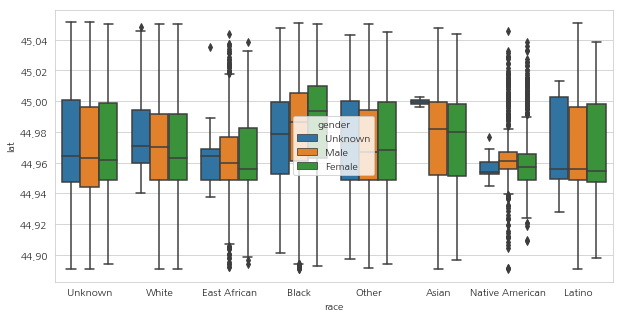

In [91]:
plt.figure(figsize=[10,5])
sns.boxplot(data=data1, x='race', y='lat', hue='gender')

# violin plot

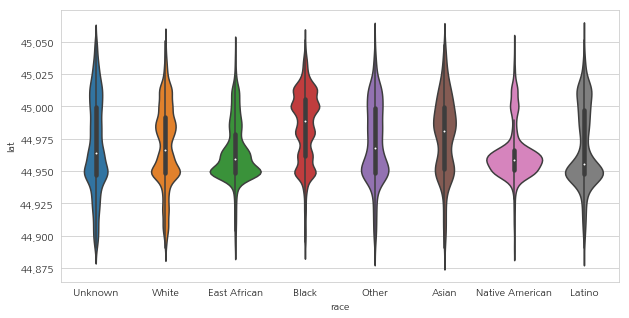

In [93]:
plt.figure(figsize=[10,5])
sns.violinplot(data=data1, x='race', y='lat') #분포까지 나타내줌

# Scatter plot : 연속형 자료에 대해서

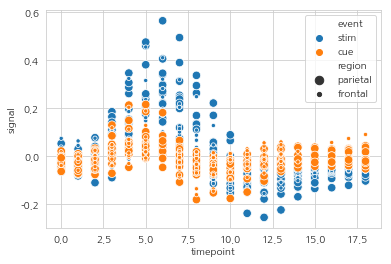

In [96]:
sns.scatterplot(data=fmri, x='timepoint', y='signal', hue='event', size='region')